# <span style="color:#37464f"><center>**Yannick NOUDJOUKOUANG**</center></span>
### **<center>JEDHA (FULLSTACK - 2021)</center>**
# **<center>SUPERVISED MACHINE LEARNING</center>**

---


## <span>**PLAN**</span>

1. Introduction
2. Data collection & EDA
3. Data visualization
4. Preprocessing & Machine Learning
5. Model assessment & Regularization
6. Conclusion

---


### **1. Introduction**
---

**Good to know** : Machine learning is a multidisciplinary science that aims at enabling machines to solve complex problems without explicitely coding the decision making process.
Supervised machine learning is a branch of this discipline that consists in solving problems for which there are already solved examples.

<p align="center"><center>
  <img width="600" height="400" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-pqOYlRPtw4Q57jSGSvRgcY4lksjvmq2OXQ&usqp=CAU">
</center>
    </p>

# Conversion rate 

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅


<p align="center"><center>
    
  <img width="600" height="200" src="https://i.morioh.com/200810/3149e0ad.webp">
</center>
    
</p>


## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !



### **2. Data collection & EDA**
---

## A) IMPORT LIBRARIES

In [1]:
!pip install plotly -q

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

## B) EXPLORATORY DATA ANALYSIS

### 1. Dataset overview

In [3]:
df = pd.read_csv('conversion_data_train.csv')
display(df.head())

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [4]:
print('Rough analysis')
print(df.info())
print(' ')
print('------------------')
print(' ')
print(df.nunique())
print(' ')
print('------------------')
print(' ')
print('* The dataset has initially {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

Rough analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB
None
 
------------------
 
country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64
 
------------------
 
* The dataset has initially 284580 rows and 6 columns.


In [5]:
df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


### 2. Missing values

In [6]:
print(df.isnull().sum())
print(' ')
print('------------------')
print(' ')
print('We can see that except the column "Store" all the oother columns have missing values')
print(' ')
print('------------------')
print(' ')
print("Percentage of missing values:(%)")
display(100*df.isnull().sum()/df.shape[0])
print(' ')

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64
 
------------------
 
We can see that except the column "Store" all the oother columns have missing values
 
------------------
 
Percentage of missing values:(%)


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64


### **3. Data visualization**
---

## COUNTRY REPARTITION

,country,source,total_country,country_weight (%)
0,China,69122,284580,24.29
1,Germany,11693,284580,4.11
2,UK,43641,284580,15.34
3,US,160124,284580,56.27


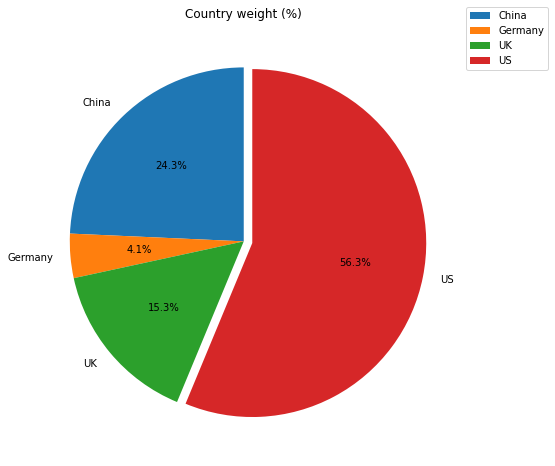

In [7]:
nbr_country = df.groupby('country')['source'].count().reset_index()
nbr_country

#Creation of column with the total of lines
nbr_country['total_country'] = nbr_country.sum()[1]

#Creation of column with of relative weight for each country (in %)
nbr_country['country_weight (%)'] = round((nbr_country['source']/nbr_country['total_country'])*100,2)

display(nbr_country)

nbr_country_perc = nbr_country.groupby(['country'])['country_weight (%)'].sum()

# Declaring indexes and values
nbr_country_values = nbr_country_perc.values
nbr_country_index = nbr_country_perc.index


#Show graph
plt.figure(figsize = (10, 8))
plt.pie(nbr_country_perc, 
        autopct = '%1.1f%%',
        labels = nbr_country_index,
        startangle= 90,
            explode = (0.0,0.0,0.0, 0.05),
           )

plt.legend(nbr_country_index, bbox_to_anchor=(1.0, 1.05))
plt.title("Country weight (%)")
plt.show()

In [8]:
px.bar(nbr_country, x = 'country', y = 'source', title='Number of users per country', color = 'source')

## CONVERSION

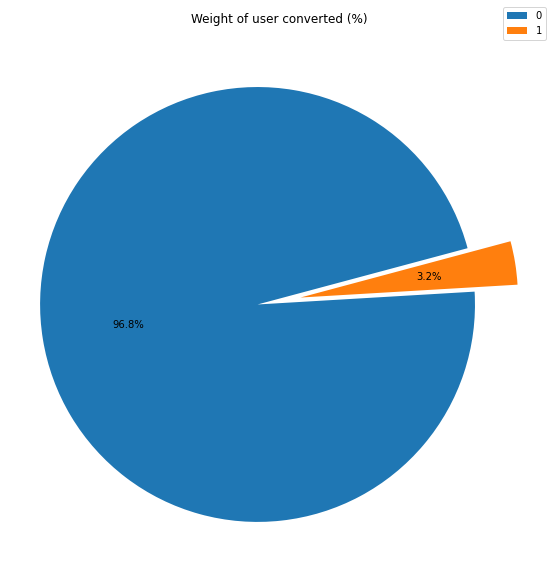

In [9]:
weight_conv = df.groupby('converted')['source'].count()

# Declaring indexes and values
nbr_converted_values = weight_conv.values
nbr_converted_index = weight_conv.index

plt.figure(figsize = (10, 10))

plt.pie(nbr_converted_values, 
        autopct = '%1.1f%%',
        #labels = nbr_converted_index,
        startangle= 15,
        explode = (0.1,0.1)
           )

plt.legend(nbr_converted_index, bbox_to_anchor=(1.0, 1.05))

plt.title("Weight of user converted (%)")

plt.show()

In [10]:
#Encoding the values as categorial
df['new_user'] = df['new_user'].apply(lambda x : 'yes' if x == 1 
                                                                else 'no' if x == 0
                                                                          else x)

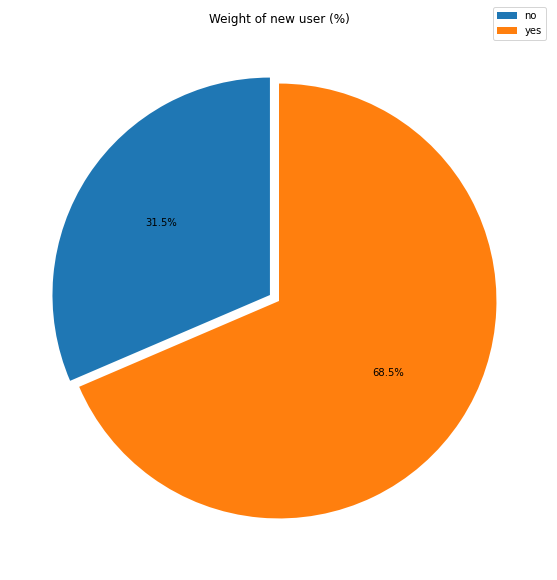

In [11]:
#Weight of new vs current users
weight_newu = df.groupby('new_user')['converted'].count()

# Declaring indexes and values
nbr_weight_newu_values = weight_newu.values
nbr_weight_newu_index = weight_newu.index

plt.figure(figsize = (10, 10))

plt.pie(nbr_weight_newu_values, 
        autopct = '%1.1f%%',
        #labels = nbr_weight_newu_index,
        startangle= 90,
        explode = (0.05,0.0)
           )

plt.legend(nbr_weight_newu_index, bbox_to_anchor=(1.0, 1.05))

plt.title("Weight of new user (%)")

plt.show()

## VISITED PAGES

In [12]:
#Sub sataset per country (count)
df_China = df.query('country == "China"')
df_China_pg = df_China.groupby(['source'])['total_pages_visited'].count()

df_Ger = df.query('country == "Germany"')
df_Ger_pg = df_Ger.groupby(['source'])['total_pages_visited'].count()

df_UK = df.query('country == "UK"')
df_UK_pg = df_UK.groupby(['source'])['total_pages_visited'].count()

df_USA = df.query('country == "US"')
df_USA_pg = df_USA.groupby(['source'])['total_pages_visited'].count()

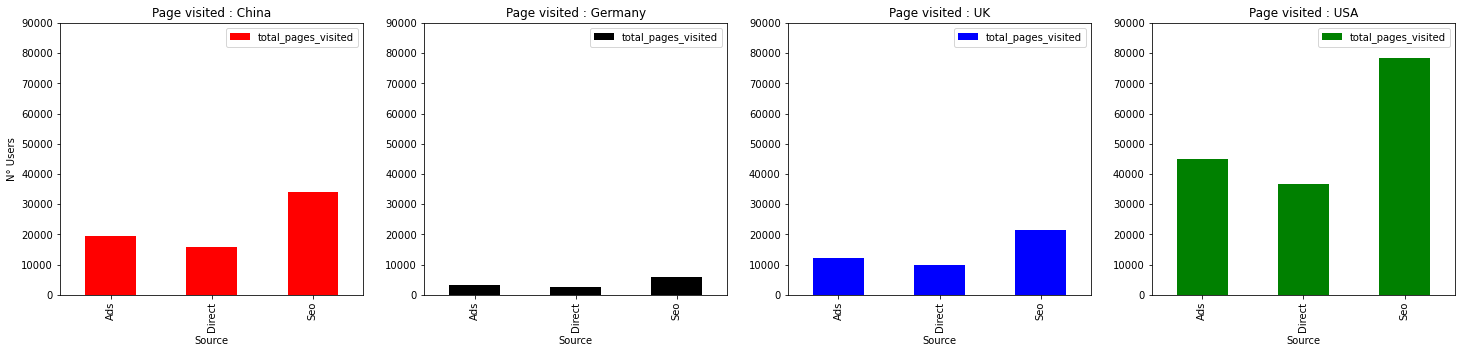

In [13]:
#Show graphs
plt.subplot(141) 
df_China_pg.plot(kind='bar', title='Page visited : China', ylabel='N° Users',
         xlabel='Source', figsize=(20, 5), legend = True, color='red')
plt.ylim([0, 90000])

plt.subplot(142) 
df_Ger_pg.plot(kind='bar', title='Page visited : Germany', #ylabel='N° Users',
         xlabel='Source', figsize=(15, 5), legend = True, color='black')
plt.ylim([0, 90000])

plt.subplot(143) 
df_UK_pg.plot(kind='bar', title='Page visited : UK', #ylabel='N° Users',
         xlabel='Source', figsize=(15, 5), legend = True, color='blue')
plt.ylim([0, 90000])

plt.subplot(144) 
df_USA_pg.plot(kind='bar', title='Page visited : USA', #ylabel='N° Users',
         xlabel='Source', figsize=(25, 5), legend = True, color='g')
plt.ylim([0, 90000])

plt.show()

In [14]:
#Creation of subdataset per country (mean)
df_China = df.query('country == "China"')
df_China_conv = df_China.groupby(['country']).mean()

df_Ger = df.query('country == "Germany"')
df_Ger_conv = df_Ger.groupby(['country']).mean()

df_UK = df.query('country == "UK"')
df_UK_conv = df_UK.groupby(['country']).mean()

df_USA = df.query('country == "US"')
df_USA_conv = df_USA.groupby(['country']).mean()

,avg_converted (%)
China,0.128758
Germany,6.243051
UK,5.249651
USA,3.790812


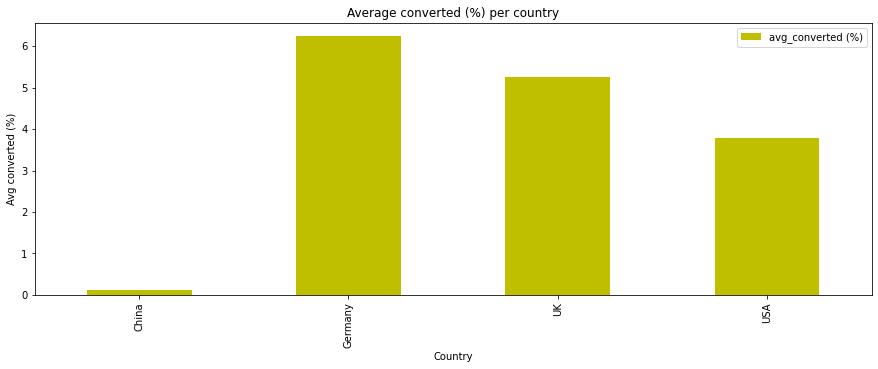

In [15]:
#Dataframe with average converted (%)

avg_conv = {'China' : df_China_conv['converted'][0]*100, 
            'Germany' : df_Ger_conv['converted'][0]*100,
           'UK' : df_UK_conv['converted'][0]*100,
            'USA' : df_USA_conv['converted'][0]*100
           }

df_avg_conv = pd.DataFrame.from_dict(avg_conv,orient='index')
df_avg_conv = df_avg_conv.rename(columns={0: 'avg_converted (%)'})
display(df_avg_conv)

#Show graph
df_avg_conv.plot(kind='bar', 
                     title='Average converted (%) per country', 
                         ylabel='Avg converted (%)',
                             xlabel='Country', 
                                 figsize=(15, 5), 
                                     legend = True, 
                                         color='y'
                )
plt.show()

## CONVERSION OVER VISITED PAGES

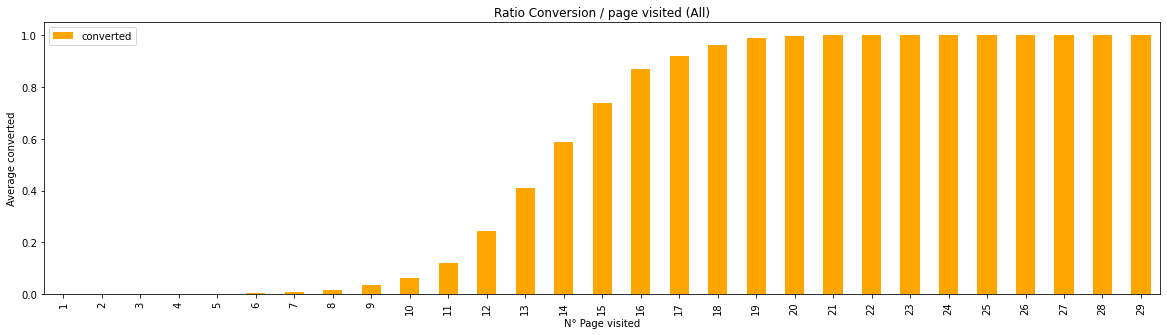

In [16]:
#General ration for all the countries
conv_pviz = df.groupby(['total_pages_visited'])['converted'].mean()

conv_pviz.plot(kind='bar', title='Ratio Conversion / page visited (All)', ylabel='Average converted',
         xlabel='N° Page visited', figsize=(20, 5), legend = True, color='orange')

plt.show()

In [17]:
#Converted dataset per country

#China
conv_pviz_China = df_China.groupby(['total_pages_visited'])['converted'].mean()

#Germany
conv_pviz_Ger = df_Ger.groupby(['total_pages_visited'])['converted'].mean()

#UK
conv_pviz_UK = df_UK.groupby(['total_pages_visited'])['converted'].mean()

#USA
conv_pviz_USA = df_USA.groupby(['total_pages_visited'])['converted'].mean()

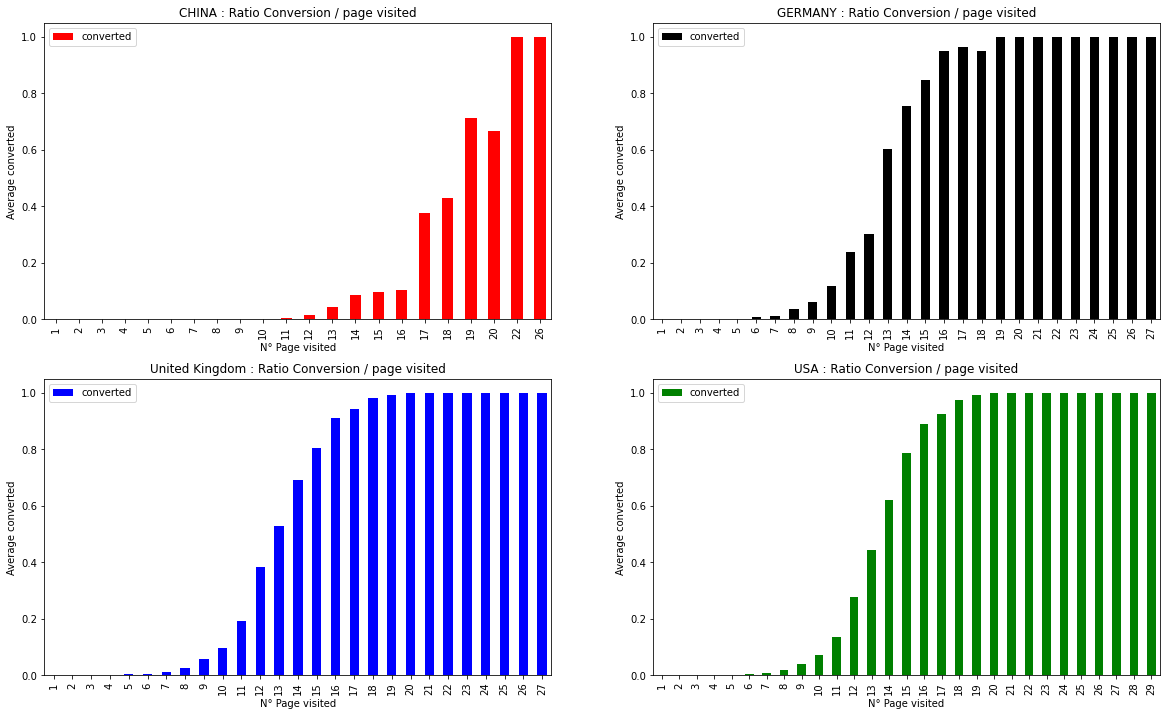

In [18]:
#Show graphs

plt.subplot(221) 
conv_pviz_China.plot(kind='bar', title='CHINA : Ratio Conversion / page visited', ylabel='Average converted',
         xlabel='N° Page visited', 
                     figsize=(15, 5), legend = True, color='red')

plt.subplot(222) 
conv_pviz_Ger.plot(kind='bar', title='GERMANY : Ratio Conversion / page visited', ylabel='Average converted',
         xlabel='N° Page visited', 
                   figsize=(15, 5), legend = True, color='black')

plt.subplot(223) 
conv_pviz_UK.plot(kind='bar', title='United Kingdom : Ratio Conversion / page visited', ylabel='Average converted',
         xlabel='N° Page visited', figsize=(15, 5), legend = True, color='blue')

plt.subplot(224) 
conv_pviz_USA.plot(kind='bar', title='USA : Ratio Conversion / page visited', ylabel='Average converted',
         xlabel='N° Page visited', figsize=(20, 12), legend = True, color='green')

plt.show()

**<span style="color:red">Wrap up : <span>** 
* **<span style="color:black">Almost nobody<span>** is converted before having seen less than 10 pages.
* Based on the above graphs we can make the assumption that there is direct relation between the number of pages visited and the average converted rate.<br>
* It allows us to explain why China despite a high number of users has a really low convertion rate and relatively few people getting a subscription.<br>
* Chineses are less exploring the website that their counterparts. They are harder to keep scrolling down pages trough the websites.<br>
* Even when they do so, ***they get fully convinced only after reviewed 22 pages when Britons, Americans and Germans are all convinced after 18 pages***.
This is a gap about **<span style="color:black">18%<span>** . It's quite huge!


## AGE PYRAMID

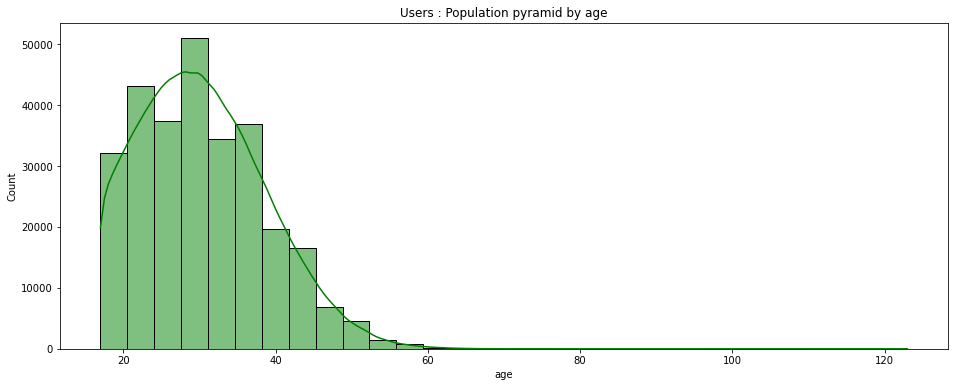


The histogram clearly demonstrates that the population is below 60 years old


In [19]:
# Variable age distribution
plt.figure(figsize = (35, 6))
plt.subplot(1,2,2)
plt.title("Users : Population pyramid by age")
sns.histplot(df['age'], bins=30, kde=True, color='g')
plt.show()
print('')
print('The histogram clearly demonstrates that the population is below 60 years old')


### **4. Preprocessing & Machine Learning**
---

## A) PREPROCESSING

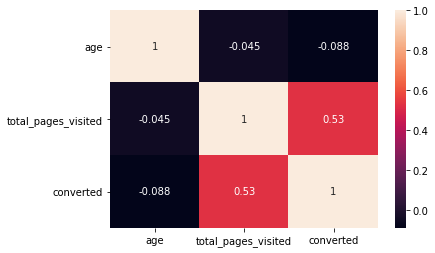

In [20]:
#Instantiate the correlation matrix
corr_matrix = df.corr()

#Corr_matrix heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
# Separate target variable Y from features X
target_name = 'converted'

print("Separating labels from features...")
Y = df.loc[:,target_name]
X = df.loc[:,[c for c in df.columns if c!=target_name]] # Keeping all columns different from target
print("...Done.")
#display(Y.head())
print()
#display(X.head())
print()

Separating labels from features...
...Done.




In [22]:
#Features in X
Feature_selection = X.columns

# print("Convert pandas DataFrames to numpy arrays...")
X = X.values
y = Y.values
#Y = Y.tolist()
print("...Done")
#print(X[0:5,:])
print()
#print(Y[0:5])

...Done



In [23]:
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 #, stratify=Y
                                                   )
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [24]:
# Create pipeline for numeric features
numeric_features = [1, 4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # if still missing values we will replace by columns' mean
    ('scaler', StandardScaler())
])

In [25]:
# Create pipeline for categorical features
categorical_features = [0, 2, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # if still missing values we will replace by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [26]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X_train[0:1,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
#print(X_test[0:1,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
#print(X_test[0:1,:])
print()

Performing preprocessings on train set...
...Done.
[[-0.19030813 -0.26094223  0.          0.          1.          1.
   0.          1.        ]
 [-0.9161838   0.63598611  0.          0.          1.          0.
   1.          0.        ]
 [ 0.29360899  1.83189056  0.          1.          0.          1.
   0.          1.        ]
 [-0.67422524  0.03803388  0.          0.          0.          1.
   0.          1.        ]
 [ 1.14046394 -1.15787057  0.          0.          1.          0.
   0.          1.        ]]

Performing preprocessings on test set...
...Done.



## B) TRAINING MODEL

In [27]:
# Train model
print("Train model...")
classifier = LogisticRegression()

print("Training model...")
classifier.fit(X_train, y_train) # Training is always done on train set !!
print("...Done.")

Train model...
Training model...
...Done.


## C) PREDICTION MODELS

In [28]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]



In [29]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[0 0 0 0 0]



## D) PERFORMANCE ASSESSMENT

In [30]:
# Print R^2 scores
print('R2 score on training set : %.3f' % r2_score(y_train, y_train_pred,multioutput='variance_weighted'))
print('R2 score on test set : %.3f' % r2_score(y_test, y_test_pred,multioutput='variance_weighted'))

R2 score on training set : 0.561
R2 score on test set : 0.552


In [31]:
# The mean squared error on train
print("Mean squared error on test: %.2f" % np.mean((classifier.predict(X_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score on test: %.4f' % classifier.score(X_train, y_train))

Mean squared error on test: 0.01
Variance score on test: 0.9863


In [32]:
# The mean squared error on test
print("Mean squared error on test: %.2f" % np.mean((classifier.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score on test: %.4f' % classifier.score(X_test, y_test))

Mean squared error on test: 0.01
Variance score on test: 0.9859


In [33]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))

f1-score on train set :  0.7650256720024163
f1-score on test set :  0.7581423401688782


In [34]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(y_train, y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(y_test, y_test_pred))
print()

Confusion matrix on train set : 
[[219486    848]
 [  2264   5066]]

Confusion matrix on test set : 
[[54857   209]
 [  593  1257]]



TRAIN SET
---
The confusion matrix shows that the model seems pretty robust on train set!


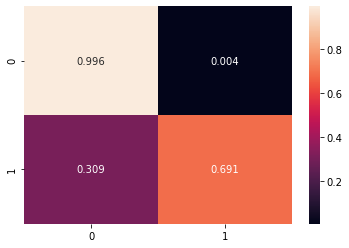

In [35]:
print('TRAIN SET')
print('---')
cm = confusion_matrix(y_train, y_train_pred, normalize="true")

sns.heatmap(cm, annot=True, fmt=".3f");
print('The confusion matrix shows that the model seems pretty robust on train set!')

TEST SET
---
The confusion matrix shows that the model seems pretty robust on test set either!


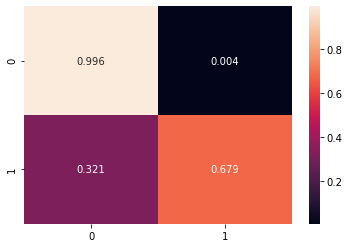

In [36]:
print('TEST SET')
print('---')
cm = confusion_matrix(y_test, y_test_pred, normalize="true")

sns.heatmap(cm, annot=True, fmt=".3f");
print('The confusion matrix shows that the model seems pretty robust on test set either!')

## E) RANDOM TREE

In [37]:
# Create a random tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Determining best hyperparameters
max_depth = [5, 6, 7, 8, 9]
min_samples_split = [2, 5, 10, 20]

dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), cv=5,
                       param_grid={"max_depth":max_depth, "min_samples_split":min_samples_split},
                      verbose=2)

dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_depth=5, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_depth=5, min_samples_split=2, total=   0.2s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.2s
[CV] max_depth=5, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................. max_depth=5, min_samples_split=2, total=   0.2s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.2s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.2s
[CV] max_depth=5, min_samples_split=5 ................................
[CV] ................. max_depth=5, min_samples_split=5, total=   0.2s
[CV] max_depth=5, min_samples_split=5 ................................
[CV] ................. max_depth=5, min_samples_split=5, total=   0.2s
[CV] max_depth=5, min_samples_split=5 ................................
[CV] ................. max_depth=5, min_samples_split=5, total=   0.2s
[CV] max_depth=5, min_samples_split=5 ................................
[CV] ................. max_depth=5, min_samples_split=5, total=   0.2s
[CV] max_depth=5, min_samples_split=5 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [2, 5, 10, 20]},
             verbose=2)

In [39]:
print("Hyperparameters that give the best score : ", dt_grid.best_params_)
print("Best score : ", dt_grid.best_score_)

print("...Done.")

Hyperparameters that give the best score :  {'max_depth': 9, 'min_samples_split': 10}
Best score :  0.9852370154891451
...Done.


In [40]:
# Apply the grid search outputs into the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=dt_grid.best_params_['max_depth'],
                           min_samples_split=dt_grid.best_params_['min_samples_split'])
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=10)

In [41]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = dt.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = dt.predict(X_test)
print("...Done.")
print(y_test_pred)
print()


Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [42]:
# Performing predictions with Random Tree and creating a csv file

Y_predictions = pd.DataFrame(columns=['converted'],data=y_test_pred)
Y_predictions.to_csv('conversion_data_train_predictions_Decision_Tree.csv', index=False)

In [43]:
# Model evaluation
print("Train score: {}".format(classifier.score(X_train, y_train)))
print("Test score: {}".format(classifier.score(X_test, y_test)))

Train score: 0.9885533066273104
Test score: 0.9840642350130017


In [44]:
# The f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(y_train, dt.predict(X_train)))
print("f1-score on test set : ", f1_score(y_test, dt.predict(X_test)))

f1-score on train set :  0.773377503388044
f1-score on test set :  0.7462326702833033


In [45]:
# Computing other performance metrics to better understand what the model is doing
from sklearn.metrics import classification_report
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55066
           1       0.84      0.67      0.75      1850

    accuracy                           0.99     56916
   macro avg       0.92      0.83      0.87     56916
weighted avg       0.98      0.99      0.98     56916



### Our score is already good but we can try a random forest model!

## F) RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [47]:
# Determining best hyperparameters

max_depth = [5, 6, 7, 8, 9]
min_samples_split = [2, 5, 10, 20]
n_estimators = (10, 20, 30)

rf_grid = GridSearchCV(estimator=RandomForestClassifier(), cv=5,
                       param_grid={"max_depth":max_depth, "min_samples_split":min_samples_split,"n_estimators":n_estimators},
                      verbose=2)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, total=   0.7s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=5, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] max_depth=5, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] max_depth=5, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=20, total=   1.2s
[CV] max_depth=5, min_samples_split=2, n_estimators=20 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  7.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': (10, 20, 30)},
             verbose=2)

In [48]:
print("Hyperparameters that give the best score : ", rf_grid.best_params_)
print("Best score : ", rf_grid.best_score_)

Hyperparameters that give the best score :  {'max_depth': 9, 'min_samples_split': 20, 'n_estimators': 20}
Best score :  0.9861023268900689


In [49]:
drd = RandomForestClassifier(n_estimators = rf_grid.best_params_['n_estimators'], max_depth=rf_grid.best_params_['max_depth'],
                           min_samples_split=rf_grid.best_params_['min_samples_split'])
drd.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=20, n_estimators=20)

In [50]:
rf_grid.best_params_

{'max_depth': 9, 'min_samples_split': 20, 'n_estimators': 20}

In [51]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = drd.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = drd.predict(X_test)
print("...Done.")
print(y_test_pred)
print()


Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [52]:
# The f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(y_train, drd.predict(X_train)))
print("f1-score on test set : ", f1_score(y_test, drd.predict(X_test)))


f1-score on train set :  0.7670602668302406
f1-score on test set :  0.7526815813668403


In [53]:
# Computing other performance metrics to better understand what the model is doing
print(classification_report(y_test, drd.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55066
           1       0.87      0.66      0.75      1850

    accuracy                           0.99     56916
   macro avg       0.93      0.83      0.87     56916
weighted avg       0.98      0.99      0.98     56916



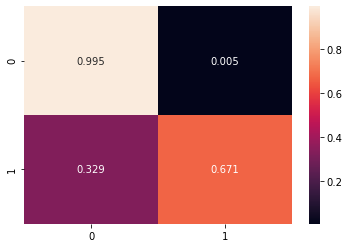

In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, classifier.predict(X_test), normalize='true')
cm

sns.heatmap(cm, annot=True, fmt=".3f");
#print('The confusion matrix shows that the model seems pretty robust on train set!')

## G) BEST MODEL ON ALL DATA

In [55]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
y = np.append(y_train,y_test)

classifier.fit(X,y)

RandomForestClassifier(n_estimators=200)

In [56]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

#features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, data_without_labels.columns]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [57]:
data_without_labels.columns
X_without_labels

array([['UK', 28, 0, 'Seo', 16],
       ['UK', 22, 1, 'Direct', 5],
       ['China', 32, 1, 'Seo', 1],
       ...,
       ['UK', 33, 1, 'Seo', 5],
       ['UK', 25, 1, 'Seo', 14],
       ['US', 22, 1, 'Seo', 2]], dtype=object)

In [58]:
print("Encoding categorical features and standardizing numerical features...")

# Create pipeline for categorical features
categorical_features = [0, 2, 3]
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # if still missing values we will replace by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Create pipeline for numeric features
numeric_features = [1, 4] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # if still missing values we will replace by columns' mean
    ('scaler', StandardScaler())
])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_without_labels = preprocessor.fit_transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31512217  3.33913917  0.          1.          0.          0.
   0.          1.        ]
 [-1.03657046  0.03888347  0.          1.          0.          1.
   1.          0.        ]
 [ 0.16584336 -1.16120951  0.          0.          0.          1.
   0.          1.        ]
 [ 0.16584336  0.33890671  0.          0.          1.          1.
   0.          0.        ]
 [-0.67584631 -0.56116302  0.          0.          0.          0.
   0.          1.        ]]


In [59]:
# Performing predictions with Random Forest creating a csv file
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_Random_Forest.csv', index=False)